## Fundamental Law of Memory Recall

#### Breif Descreption of The Model

(i) memory items are represented in the brain by overlapping random sparse neuronal ensembles in dedicated memory networks. 

(ii) The next item to be recalled is the one with a largest overlap to the current one, excluding the item that was recalled on the previous step.

More specifically, item representations are chosen as random binary {0, 1} vectors where each element of the vector chosen to be 1 with small probability f ≪ 1 independently of other elements. Overlaps are defined as scalar products between these representations.

In [1]:
import numpy as np
import time
import numpy.random as npr
import matplotlib.pyplot as plt
from tqdm import tqdm

#### Constructing The Memory Representations

We will consider a large neural ensemble of $ N $ neurons. The number of memory representations (words to be recalled) is  $ L $ and  $ R $ is the number of words recalled before the sequence enters a cycle.  

So each word is represented with a vector of $ N $ binary elements, where each element is set to 1 independently, with probability $ f $. Let's create the some memory representations in this manner:

In [2]:
N = 10000
L = 100
f = 0.01

mrs = np.array([[1 if npr.rand() < f else 0 for i in range(N)] for j in range(L)])    # a matrix holding all L memroy representations of length N

Now let's create a similarity matrix (SM) for this memory representations:

In [3]:
sm = np.array([[np.dot(mrs[i] , mrs[j]) for j in range(L)] for i in range(L)])

#### Transition Between Memory Items

Now let's write down a function that does the job of transition between memory items for us. It will need only the SM which we derived earlier. Each time we are at a particular memory representation ( a particular row in the SM) we have to look at the most similar memory representation to the current one, and make the transition to it. In case the most similar one is the one we visited in the previous step, we have to make the transition to the second most similar state. We will have to keep doing this until we reach a cycle. The function should return us the number of unique memory items visited. 

In [2]:
def m_th_largest_index(nums , m):
    
    # Convert the list to a numpy array
    arr = np.array(nums)
    
    # Find the indices that would sort the array in descending order
    sorted_indices = np.argsort(arr)[::-1]
    
    # Return the index of the mth largest number
    return sorted_indices[m - 1]

In [3]:
def sequencer(sm):   
    
    sequence_length = 3 *  len(sm)
    sequence = np.zeros(sequence_length , dtype = int)
    
    for i in range(sequence_length - 1):
        
        first_largest_index = m_th_largest_index(sm[sequence[i]] , 2)
        second_largest_index = m_th_largest_index(sm[sequence[i]] , 3)
        
        if first_largest_index != sequence[i-1]: sequence[i+1] = first_largest_index
        else: sequence[i+1] = second_largest_index
            
    return sequence

Now as an example, let's find the recall sequence of the SM we just found using the above funcrion:

In [6]:
print(sm)

[[107   0   0 ...   2   0   0]
 [  0  83   0 ...   0   0   1]
 [  0   0 101 ...   1   1   1]
 ...
 [  2   0   1 ...  97   1   1]
 [  0   0   1 ...   1 112   2]
 [  0   1   1 ...   1   2 100]]


In [7]:
sequence = sequencer(sm)
print(sequence)

[ 0 86 51 65 49 20 31 70 37 63 57 99 38 34 45 96 88 30 93 91 50 54 74 76
 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74
 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54
 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50
 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91
 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76
 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74
 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54
 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50
 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91
 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76
 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74 76 91 50 54 74
 76 91 50 54 74 76 91 50 54 74 76 91]


The numbser of recalled items $ R $ is simply the number of unique items present in the sequence list:

In [8]:
R = len(np.unique(sequence))
print(R)

24


Let's fix $ f $. For a single value of $ L $ we need to repeat the above procedure for $ T $ trials and report the average at the end. Let's define a function that does this for us:

In [9]:
def R(f, T , N , L):
    
    Rs = np.zeros(T)
    
    for i in tqdm(range(T), desc=f'Trials (L={L})'):
        
        mrs = np.array([[1 if npr.rand() < f else 0 for i in range(N)] for j in range(L)])
        sm = np.array([[np.dot(mrs[i] , mrs[j]) for j in range(L)] for i in range(L)])
        Rs[i] = len(np.unique(sequencer(sm)))
        
    return np.mean(Rs) , np.std(Rs)

In [10]:
start_time = time.time() 

R(f = 0.01, T = 20 , N = 100000 , L = 50)

end_time = time.time()  

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Trials (L=50): 100%|██████████| 20/20 [02:34<00:00,  7.73s/it]

Elapsed time: 154.69 seconds


Then we can vary the value of $ L $:

In [16]:
Ls = [10 , 20 , 30 , 50 , 150 , 250 , 500]
results = []

In [18]:
for L in Ls:
    
    results.append(R(f = 0.01, T = 10 , N = 100000 , L = L))

Trials (L=500): 100%|██████████| 10/10 [05:28<00:00, 32.88s/it]


We need around 1.25 minutes per trial. for 100 trials it adds up to 2 hours, and for 10000, 20 days roughly!

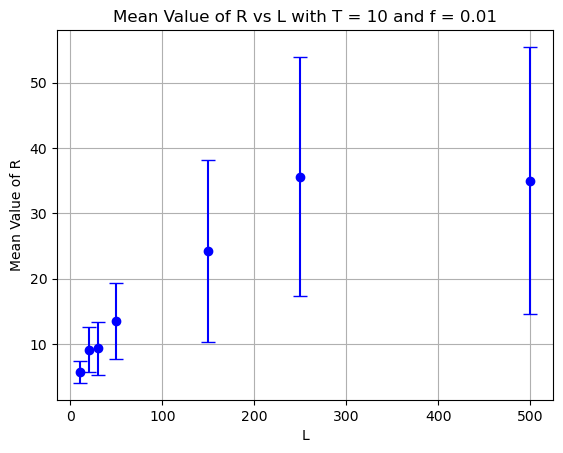

In [36]:
mean_values_10 = [result[0] for result in results]
std_values_10 = [result[1] for result in results]

plt.errorbar(Ls, mean_values_10, yerr=std_values_10, fmt='o', color='b', capsize=5)
plt.xlabel('L')
plt.ylabel('Mean Value of R')
plt.title('Mean Value of R vs L with T = 10 and f = 0.01')
plt.grid(True)
plt.show()

In the $ f<< 1 $ limit, practically the SM is a random symmetric matrix. Therfore to see the results in this limit, I define a new function to create the SM for us:

In [4]:
def random_symmetric_matrix(n):
    # Generate a random matrix of shape (n, n)
    matrix = np.random.rand(n, n)
    
    # Make the matrix symmetric by averaging with its transpose
    symmetric_matrix = (matrix + matrix.T) / 2.0
    
    return symmetric_matrix

In [4]:
L = 10
sm = random_symmetric_matrix(L)
print(sm)

[[0.73265596 0.65133045 0.26539259 0.35192313 0.41228659 0.33630188
  0.42264989 0.42665625 0.58637652 0.735277  ]
 [0.65133045 0.97841937 0.49726701 0.75710999 0.44162626 0.17861811
  0.30029197 0.66716556 0.68305837 0.52154295]
 [0.26539259 0.49726701 0.10213454 0.45044346 0.50659404 0.51288028
  0.53060173 0.77431938 0.889436   0.39288943]
 [0.35192313 0.75710999 0.45044346 0.81502201 0.73333114 0.59706215
  0.34603412 0.40651168 0.91086637 0.13913996]
 [0.41228659 0.44162626 0.50659404 0.73333114 0.24444546 0.49854156
  0.43899133 0.32555193 0.52150538 0.31208627]
 [0.33630188 0.17861811 0.51288028 0.59706215 0.49854156 0.7911296
  0.07861982 0.46551437 0.52544507 0.61165213]
 [0.42264989 0.30029197 0.53060173 0.34603412 0.43899133 0.07861982
  0.5253483  0.62256985 0.8620904  0.27884273]
 [0.42665625 0.66716556 0.77431938 0.40651168 0.32555193 0.46551437
  0.62256985 0.76378344 0.6141556  0.86997392]
 [0.58637652 0.68305837 0.889436   0.91086637 0.52150538 0.52544507
  0.8620904  

The rest of the code will look like the previous cases:

In [5]:
def R_symmetric(f, T , N , L):
    
    Rs = np.zeros(T)
    
    for i in tqdm(range(T), desc=f'Trials (L={L})'):
        
        mrs = np.array([[1 if npr.rand() < f else 0 for i in range(N)] for j in range(L)])
        sm = random_symmetric_matrix(L)
        Rs[i] = len(np.unique(sequencer(sm)))
        
    return np.mean(Rs) , np.std(Rs)

In [8]:
start_time = time.time() 

result = R_symmetric(f = 0.01, T = 20 , N = 100000 , L = 50)

end_time = time.time()  

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

print(result)

Trials (L=50): 100%|██████████| 20/20 [02:27<00:00,  7.37s/it]

Elapsed time: 147.49 seconds
(11.1, 4.856953777832357)


It is also worth looking at the distributions of $ R $ at each L for a given $ f $. For this purpose, I define a new function to simply return the array of $ R $s over many trials:

In [11]:
def R_array(f, T , N , L):
    
    Rs = np.zeros(T)
    
    for i in tqdm(range(T), desc=f'Trials (L={L})'):
        
        mrs = np.array([[1 if npr.rand() < f else 0 for i in range(N)] for j in range(L)])
        sm = np.array([[np.dot(mrs[i] , mrs[j]) for j in range(L)] for i in range(L)])
        Rs[i] = len(np.unique(sequencer(sm)))
        
    return Rs

In [12]:
start_time = time.time() 

Rs = R_array(f = 0.01, T = 1000 , N = 100000 , L = 10)

end_time = time.time()  

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Trials (L=10): 100%|██████████| 1000/1000 [07:29<00:00,  2.22it/s]

Elapsed time: 449.46 seconds


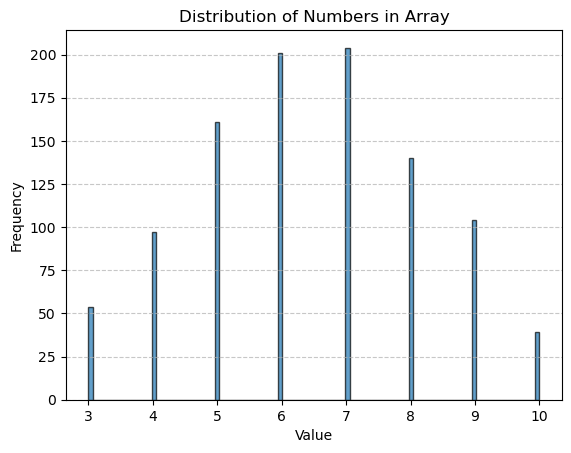

In [14]:
array = Rs

# Plotting the histogram
plt.hist(array, bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Numbers in Array')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Let's say we have a random $ SM $. We wnat to know the probability: given that in the ith row, the second maximum value is in jth column, then in the jth row, the ith column has the second maximum value. 

In [73]:
sm = random_symmetric_matrix(10)

j = m_th_largest_index(sm[0] , 2)
i = m_th_largest_index(sm[j] , 2)

i == 0

False

In [82]:
count = 0

for t in range(10000): 
    
    sm = random_symmetric_matrix(500)

    j = m_th_largest_index(sm[0] , 2)
    i = m_th_largest_index(sm[j] , 2)
    
    if i == 0: count += 1

In [83]:
count/10000

0.2607

### The Final Results

Here are the arrays, containing the results for each f.

In [16]:
# for f = 0.1:

data = [
    [5.94, 1.69],
    [8.14, 2.83],
    [9.62, 3.63],
    [11.95, 4.85],
    [18.29, 8.07],
    [22.15, 10.09],
    [28.63, 13.77]
]

# Convert the data into a NumPy array
data_array = np.array(data)

# Split the array into two columns
R_0_1 = data_array[:, 0]
std_0_1 = data_array[:, 1]

print("R_0_1:", R_0_1)
print("std_0_1:", std_0_1)

R_0_1: [ 5.94  8.14  9.62 11.95 18.29 22.15 28.63]
std_0_1: [ 1.69  2.83  3.63  4.85  8.07 10.09 13.77]


In [17]:
# for f = 0.05:

data_05 = [
    [6.15, 1.78],
    [8.61, 3.09],
    [10.36, 4.01],
    [13.15, 5.41],
    [21.35, 9.67],
    [26.42, 12.40],
    [36.00, 17.25]
]

# Convert the data into a NumPy array
data_array_05 = np.array(data_05)

# Split the array into two columns
R_0_05 = data_array_05[:, 0]
std_0_05 = data_array_05[:, 1]

print("R_0_05:", R_0_05)
print("std_0_05:", std_0_05)

R_0_05: [ 6.15  8.61 10.36 13.15 21.35 26.42 36.  ]
std_0_05: [ 1.78  3.09  4.01  5.41  9.67 12.4  17.25]


In [18]:
# for f = 0.001

data_001 = [
    [6.37, 1.79],
    [8.92, 3.25],
    [10.91, 4.30],
    [14.14, 6.02],
    [24.12, 11.21],
    [30.89, 14.94],
    [42.99, 21.23]
]

# Convert the data into a NumPy array
data_array_001 = np.array(data_001)

# Split the array into two columns
R_0_001 = data_array_001[:, 0]
std_0_001 = data_array_001[:, 1]

print("R_0_001:", R_0_001)
print("std_0_001:", std_0_001)

R_0_001: [ 6.37  8.92 10.91 14.14 24.12 30.89 42.99]
std_0_001: [ 1.79  3.25  4.3   6.02 11.21 14.94 21.23]


In [19]:
# for random symmetric SM

data_sym = [
    [6.32, 1.84],
    [9.20, 3.33],
    [11.42, 4.44],
    [14.90, 6.19],
    [25.91, 11.82],
    [33.64, 15.99],
    [48.04, 23.44]
]

# Convert the data into a NumPy array
data_array_sym = np.array(data_sym)

# Split the array into two columns
R_sym = data_array_sym[:, 0]
std_sym = data_array_sym[:, 1]

print("R_sym:", R_sym)
print("std_sym:", std_sym)

R_sym: [ 6.32  9.2  11.42 14.9  25.91 33.64 48.04]
std_sym: [ 1.84  3.33  4.44  6.19 11.82 15.99 23.44]


Now let's plot the analytical curve alongwith the results from simulations:

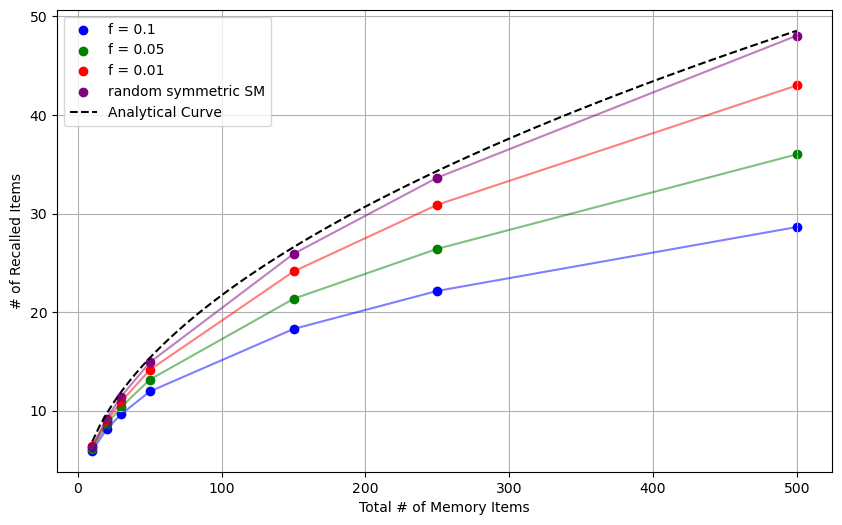

In [23]:
# Given data for the scatter plots
Ls = [10, 20, 30, 50, 150, 250, 500]
R_0_1 = np.array([5.94, 8.14, 9.62, 11.95, 18.29, 22.15, 28.63])
R_0_05 = np.array([6.15, 8.61, 10.36, 13.15, 21.35, 26.42, 36.00])
R_0_001 = np.array([6.37, 8.92, 10.91, 14.14, 24.12, 30.89, 42.99])
R_sym = np.array([6.32, 9.20, 11.42, 14.90, 25.91, 33.64, 48.04])

# Analytical curve
L_analytical = np.linspace(min(Ls), max(Ls), 100)
R_analytical = np.sqrt(1.5 * np.pi * L_analytical)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plots
plt.scatter(Ls, R_0_1, label='f = 0.1', color='blue')
plt.scatter(Ls, R_0_05, label='f = 0.05', color='green')
plt.scatter(Ls, R_0_001, label='f = 0.01', color='red')
plt.scatter(Ls, R_sym, label='random symmetric SM', color='purple')

# Connect scatter points with lines for each legend
plt.plot(Ls, R_0_1, color='blue', linestyle='-', alpha=0.5)
plt.plot(Ls, R_0_05, color='green', linestyle='-', alpha=0.5)
plt.plot(Ls, R_0_001, color='red', linestyle='-', alpha=0.5)
plt.plot(Ls, R_sym, color='purple', linestyle='-', alpha=0.5)

# Analytical curve
plt.plot(L_analytical, R_analytical, label='Analytical Curve', color='black', linestyle='--')

plt.xlabel('Total # of Memory Items')
plt.ylabel('# of Recalled Items')
plt.legend()
plt.grid(True)

plt.savefig('high_quality_plot.png', dpi=300, bbox_inches='tight')

plt.show()


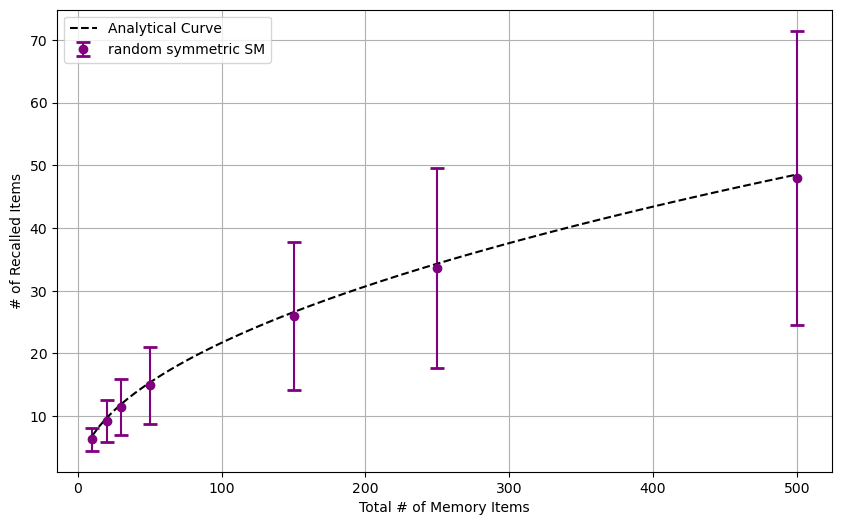

In [25]:

# Given data for R_sym
Ls = [10, 20, 30, 50, 150, 250, 500]
R_sym = np.array([6.32, 9.20, 11.42, 14.90, 25.91, 33.64, 48.04])
std_sym = np.array([1.84, 3.33, 4.44, 6.19, 11.82, 15.99, 23.44])

# Analytical curve
L_analytical = np.linspace(min(Ls), max(Ls), 100)
R_analytical = np.sqrt(1.5 * np.pi * L_analytical)

# Plotting
plt.figure(figsize=(10, 6))

# R_sym and error bars
plt.errorbar(Ls, R_sym, yerr=std_sym, fmt='o', label='random symmetric SM', color='purple', capsize=5, capthick=2)

# Analytical curve
plt.plot(L_analytical, R_analytical, label='Analytical Curve', color='black', linestyle='--')

plt.xlabel('Total # of Memory Items')
plt.ylabel('# of Recalled Items')
plt.legend()
plt.grid(True)

# Save the plot with high quality
plt.savefig('R_sym_with_error_bars.png', dpi=300, bbox_inches='tight')

plt.show()
